In [1]:
import matplotlib.pyplot as plt 
import glob
import os
from helpers.labels import get_SpaceElementClasses, get_SpaceFunctionClasses
import tensorflow as tf

# ==============================================================================
Author: Amir Ziaee, Georg Suter, Mihael Barada
Copyright: Design Computing Group TU Wien, 2022
Credits: Design Computing Group TU Wien
License: GNU GENERAL PUBLIC LICENSE Version 3
Version: 1.0.1
Maintainer: Amir Ziaee
Email: amir.ziaee@tuwien.ac.at
Status: Prototype
Description: SFS-A68: a dataset for the segmentation of space functions in apartment buildings
Url: https://github.com/A2Amir/SFS-A68
# ==============================================================================


In [2]:
folder_path = './test_results/UnetTransferLearning'

In [3]:
SEG_CLASSES = get_SpaceFunctionClasses()
for k,item in SEG_CLASSES.items():
    print(item.id, item.name, item.color)

1 DiningRoom (107,74,101)
2 FamilyRoom (166, 206, 227)
3 LivingRoom (242, 0, 192)
4 Bedroom (0, 255, 248)
5 MasterBedroom (0,175,175)
6 BoxRoom (4,72,148)
7 HomeOffice (194, 123, 160)
8 Shaft (253, 237, 0)
9 StorageRoom (255, 182, 0)
10 WalkInCloset (191, 144, 0)
11 Bathroom (255, 0, 0)
12 Toilet (69, 129, 142)
13 Kitchen (131, 126, 197)
14 LaundryRoom (0, 0, 255)
15 Elevator (9, 244, 156)
16 Stairway (168, 134, 113)
17 Entrance (151, 143, 141)
18 Hallway (125, 62, 32)
19 MainHallway (225, 138, 96)
20 InternalHallway (155, 94, 65)
21 AccessBalcony (255, 255, 22)
22 Loggia (120, 56, 145)


In [4]:
# gt_pred_chanenl_item.id_item.name 
img_paths = glob.glob('./test_results/UnetTransferLearning/' + '/**/'+ 'gt_pred_chanenl_22_Loggia.jpg', recursive=True) 
img_paths =  sorted(img_paths, key=lambda i: int(os.path.splitext(i.split('\\')[1])[0]))

In [5]:
img_paths

['./test_results/UnetTransferLearning\\0001\\gt_pred_chanenl_22_Loggia.jpg',
 './test_results/UnetTransferLearning\\0004\\gt_pred_chanenl_22_Loggia.jpg',
 './test_results/UnetTransferLearning\\0005\\gt_pred_chanenl_22_Loggia.jpg',
 './test_results/UnetTransferLearning\\0009\\gt_pred_chanenl_22_Loggia.jpg',
 './test_results/UnetTransferLearning\\0015\\gt_pred_chanenl_22_Loggia.jpg',
 './test_results/UnetTransferLearning\\0030\\gt_pred_chanenl_22_Loggia.jpg',
 './test_results/UnetTransferLearning\\0037\\gt_pred_chanenl_22_Loggia.jpg',
 './test_results/UnetTransferLearning\\0039\\gt_pred_chanenl_22_Loggia.jpg',
 './test_results/UnetTransferLearning\\0040\\gt_pred_chanenl_22_Loggia.jpg',
 './test_results/UnetTransferLearning\\0044\\gt_pred_chanenl_22_Loggia.jpg',
 './test_results/UnetTransferLearning\\0052\\gt_pred_chanenl_22_Loggia.jpg',
 './test_results/UnetTransferLearning\\0063\\gt_pred_chanenl_22_Loggia.jpg',
 './test_results/UnetTransferLearning\\0065\\gt_pred_chanenl_22_Loggia.jpg',

./test_results/UnetTransferLearning\0001\gt_pred_chanenl_22_Loggia.jpg


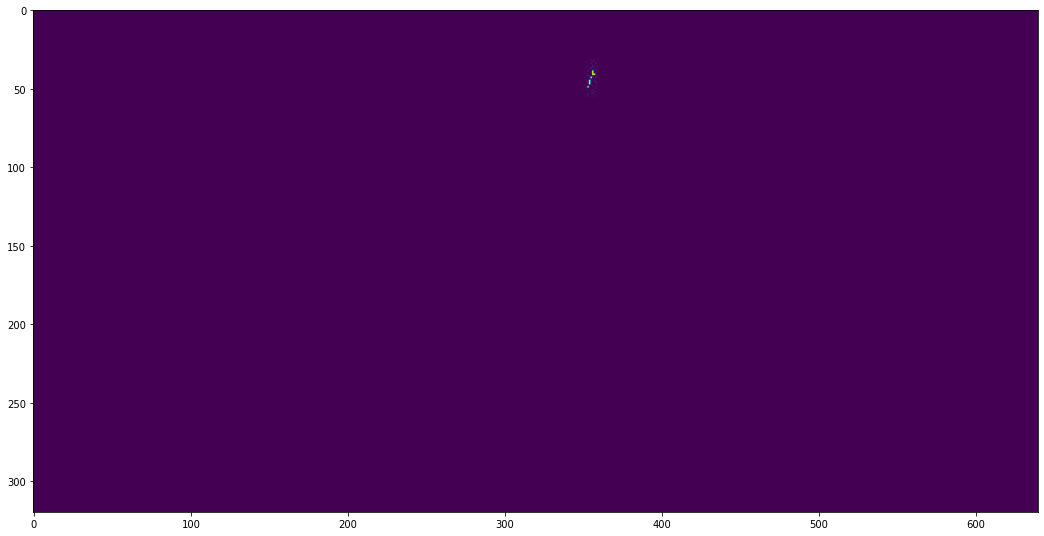

./test_results/UnetTransferLearning\0004\gt_pred_chanenl_22_Loggia.jpg


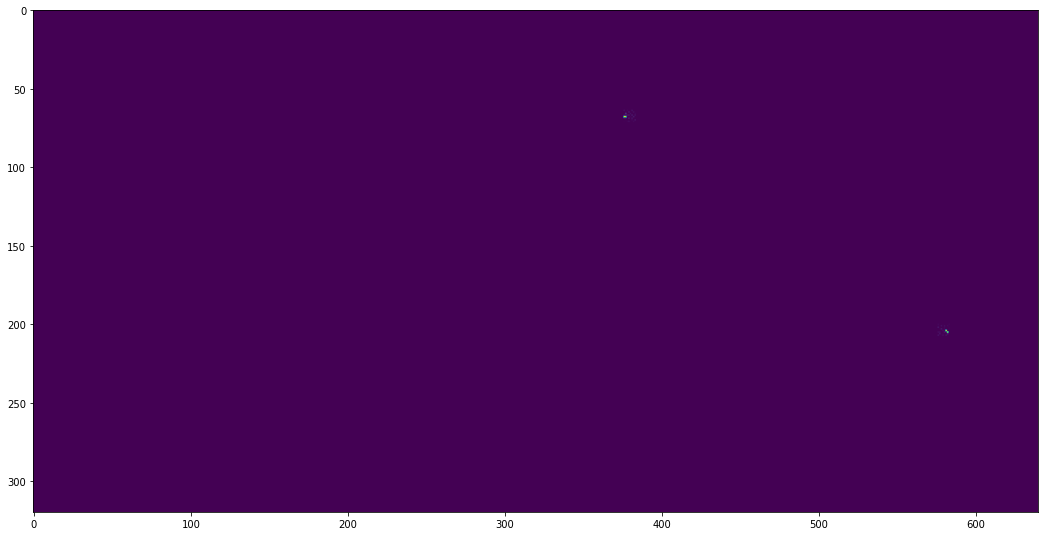

./test_results/UnetTransferLearning\0005\gt_pred_chanenl_22_Loggia.jpg


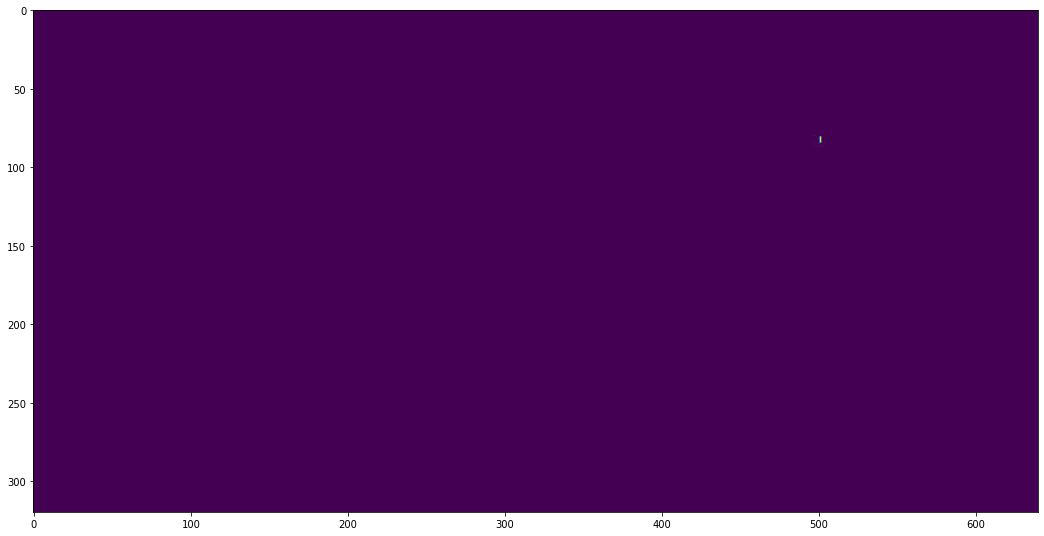

./test_results/UnetTransferLearning\0009\gt_pred_chanenl_22_Loggia.jpg


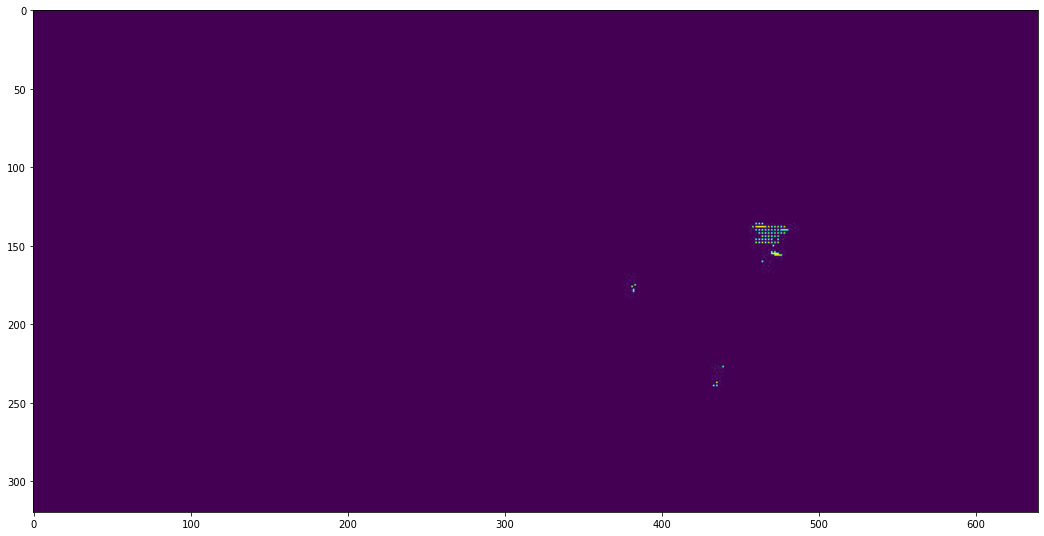

./test_results/UnetTransferLearning\0015\gt_pred_chanenl_22_Loggia.jpg


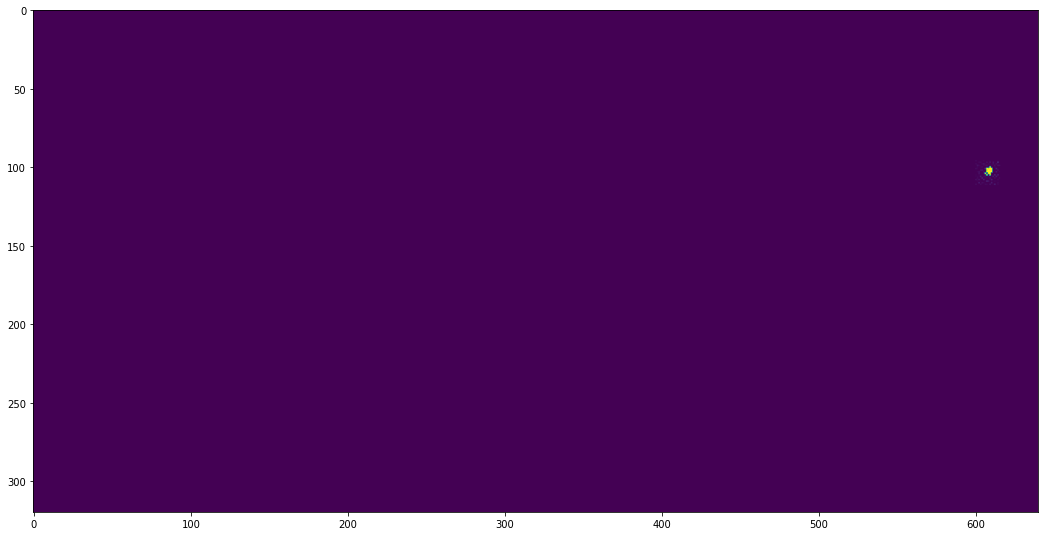

./test_results/UnetTransferLearning\0030\gt_pred_chanenl_22_Loggia.jpg


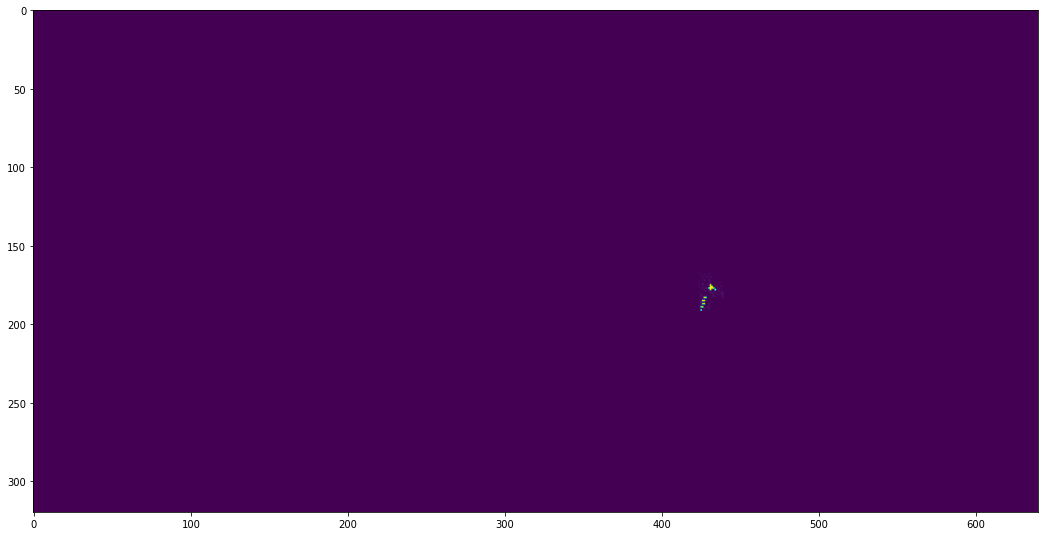

./test_results/UnetTransferLearning\0037\gt_pred_chanenl_22_Loggia.jpg


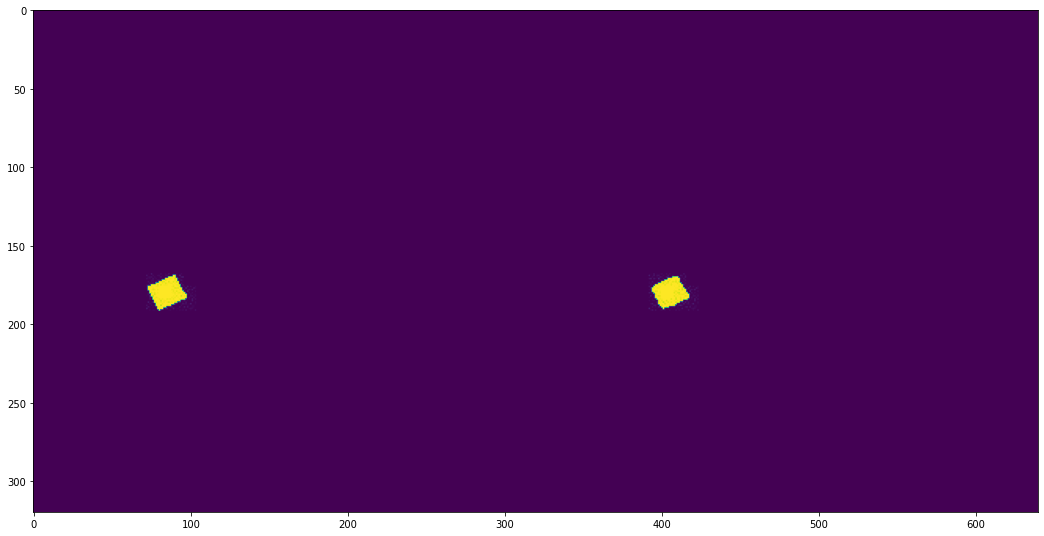

./test_results/UnetTransferLearning\0039\gt_pred_chanenl_22_Loggia.jpg


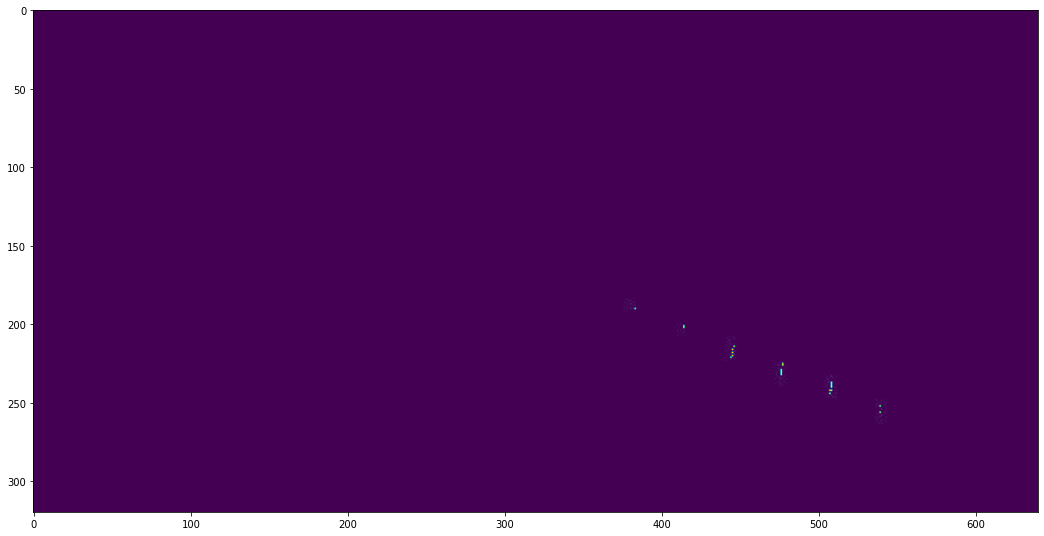

./test_results/UnetTransferLearning\0040\gt_pred_chanenl_22_Loggia.jpg


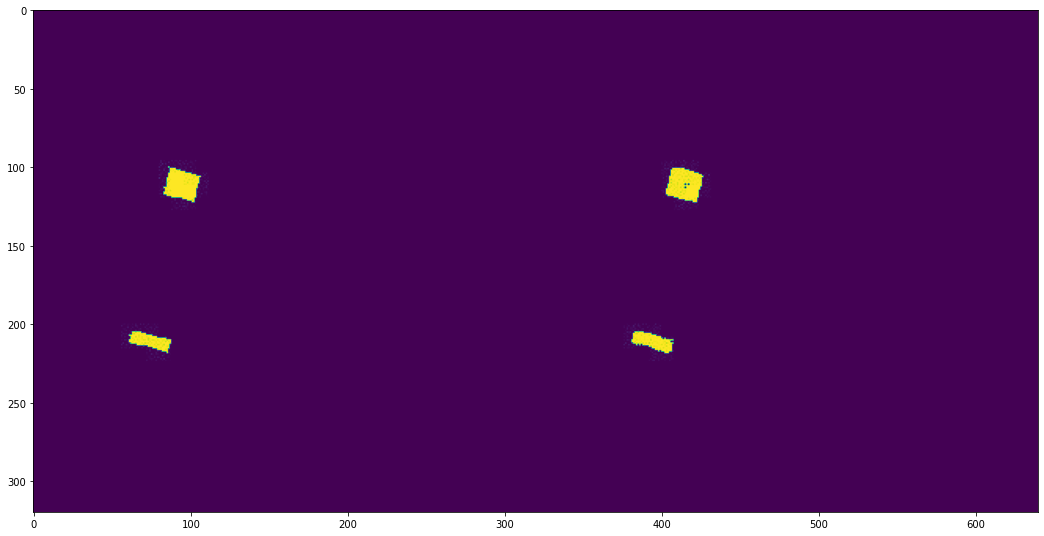

./test_results/UnetTransferLearning\0044\gt_pred_chanenl_22_Loggia.jpg


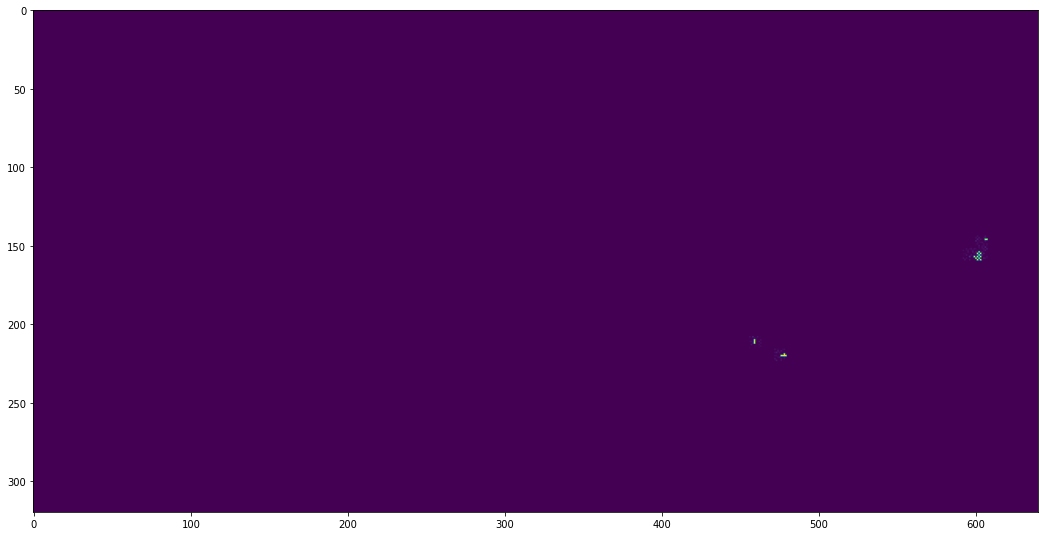

./test_results/UnetTransferLearning\0052\gt_pred_chanenl_22_Loggia.jpg


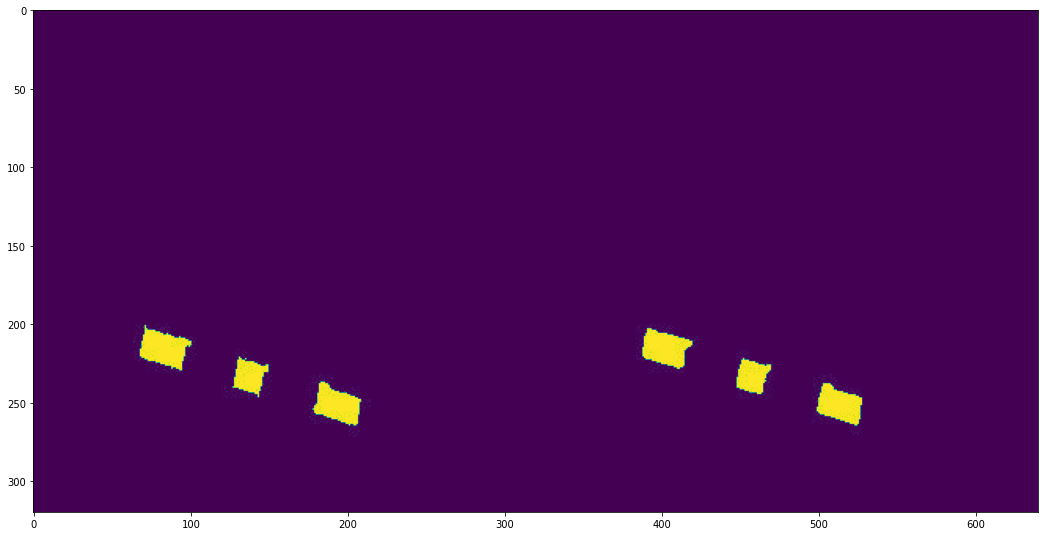

./test_results/UnetTransferLearning\0063\gt_pred_chanenl_22_Loggia.jpg


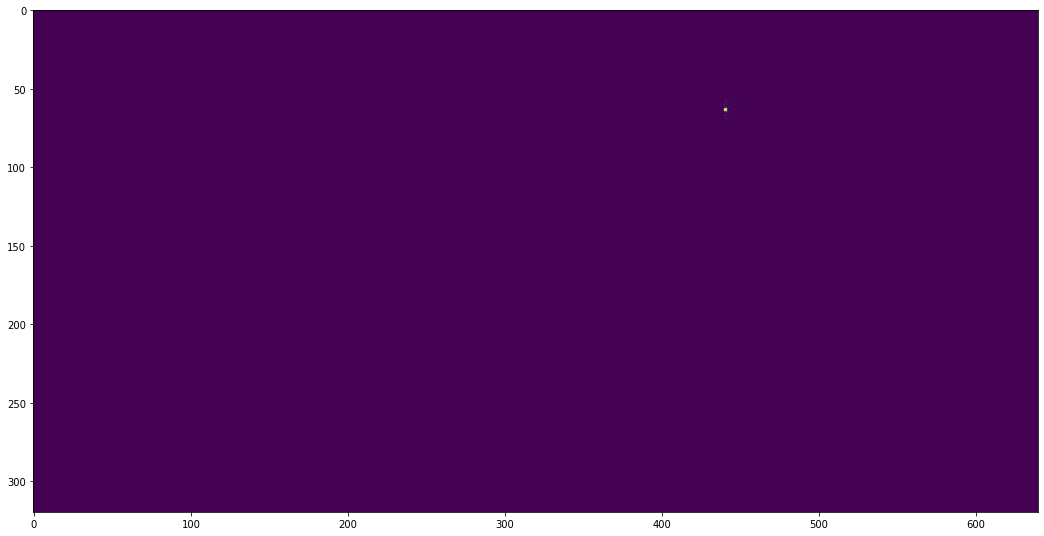

./test_results/UnetTransferLearning\0065\gt_pred_chanenl_22_Loggia.jpg


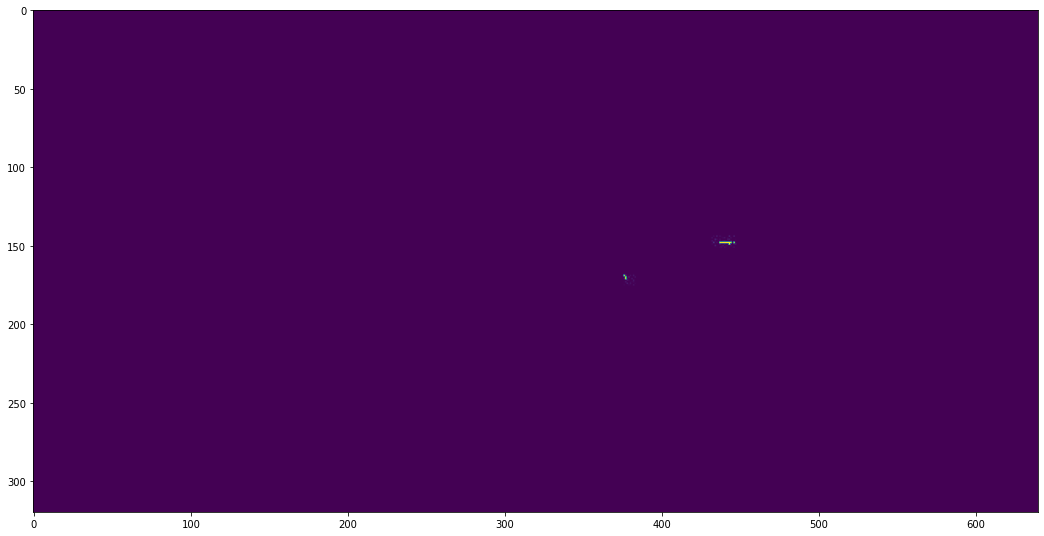

./test_results/UnetTransferLearning\0066\gt_pred_chanenl_22_Loggia.jpg


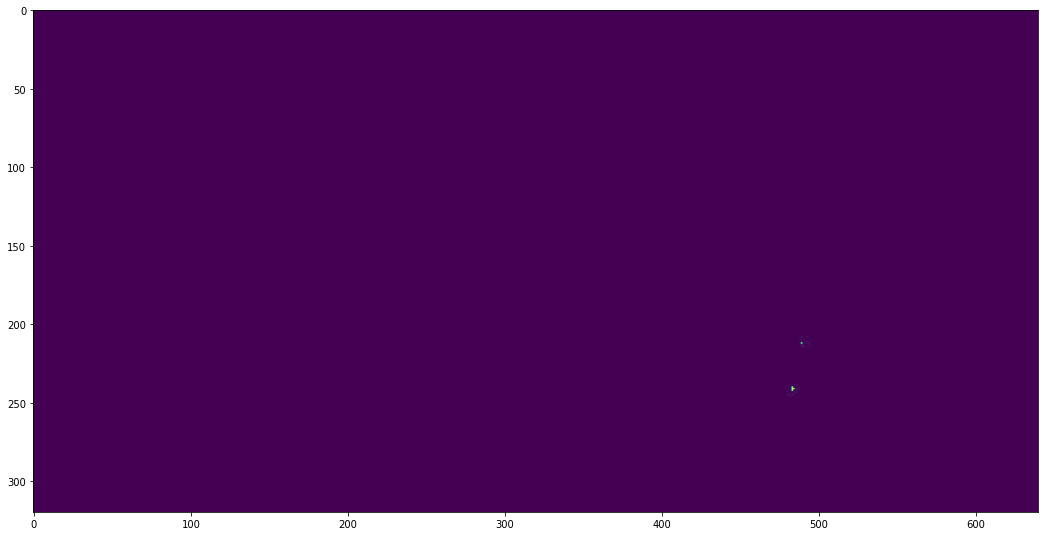

In [6]:
for path in img_paths:
    print(path)
    plt.figure(figsize=(18,18))

    img = plt.imread(path)
    plt.imshow(img)
    plt.show()

In [7]:
dataset_path = glob.glob('./data' + '/**/'+ '*_ground_truth.png', recursive=True) 
test_path = ['./data\\0066\\input\\0066_input.png',
             './data\\0065\\input\\0065_input.png',
             './data\\0030\\input\\0030_input.png',
             './data\\0063\\input\\0063_input.png',
             './data\\0009\\input\\0009_input.png',
             './data\\0044\\input\\0044_input.png',
             './data\\0052\\input\\0052_input.png',
             './data\\0039\\input\\0039_input.png',
             './data\\0015\\input\\0015_input.png',
             './data\\0040\\input\\0040_input.png',
             './data\\0001\\input\\0001_input.png',
             './data\\0037\\input\\0037_input.png',
             './data\\0004\\input\\0004_input.png',
             './data\\0005\\input\\0005_input.png']
test = [p.split('\\')[1] for p in test_path]

In [8]:
dataset_path

['./data\\0001\\ground_truth\\0001_ground_truth.png',
 './data\\0002\\ground_truth\\0002_ground_truth.png',
 './data\\0003\\ground_truth\\0003_ground_truth.png',
 './data\\0004\\ground_truth\\0004_ground_truth.png',
 './data\\0005\\ground_truth\\0005_ground_truth.png',
 './data\\0006\\ground_truth\\0006_ground_truth.png',
 './data\\0007\\ground_truth\\0007_ground_truth.png',
 './data\\0008\\ground_truth\\0008_ground_truth.png',
 './data\\0009\\ground_truth\\0009_ground_truth.png',
 './data\\0010\\ground_truth\\0010_ground_truth.png',
 './data\\0011\\ground_truth\\0011_ground_truth.png',
 './data\\0012\\ground_truth\\0012_ground_truth.png',
 './data\\0013\\ground_truth\\0013_ground_truth.png',
 './data\\0014\\ground_truth\\0014_ground_truth.png',
 './data\\0015\\ground_truth\\0015_ground_truth.png',
 './data\\0016\\ground_truth\\0016_ground_truth.png',
 './data\\0017\\ground_truth\\0017_ground_truth.png',
 './data\\0018\\ground_truth\\0018_ground_truth.png',
 './data\\0019\\ground_truth

./data\0001\ground_truth\0001_ground_truth.png


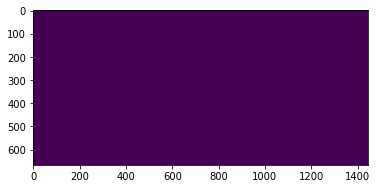

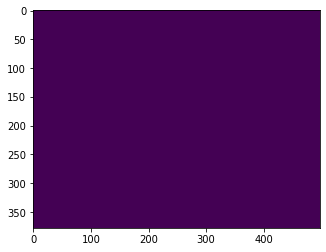

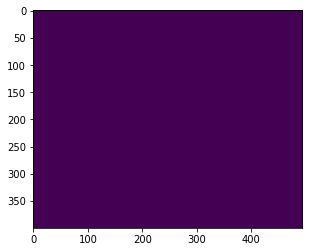

./data\0004\ground_truth\0004_ground_truth.png


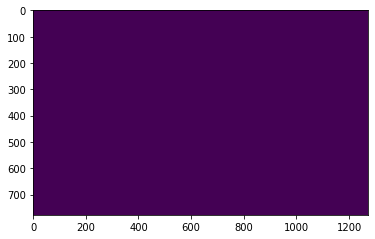

./data\0005\ground_truth\0005_ground_truth.png


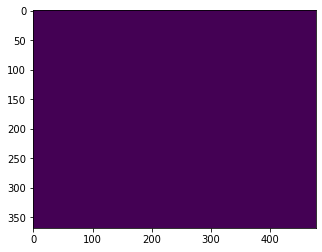

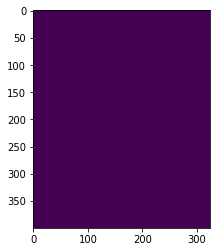

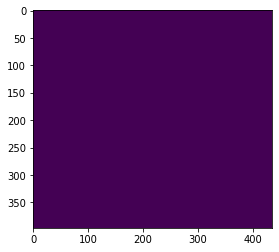

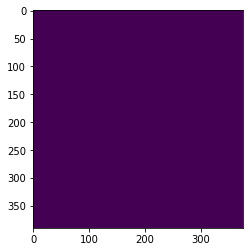

./data\0009\ground_truth\0009_ground_truth.png


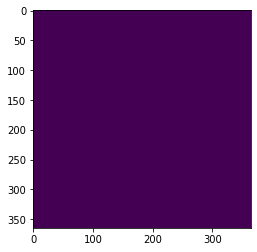

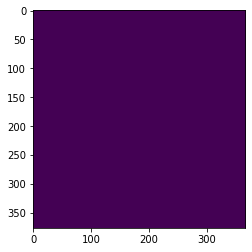

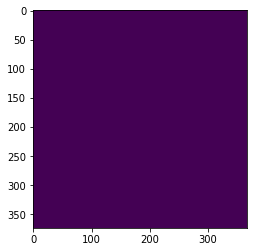

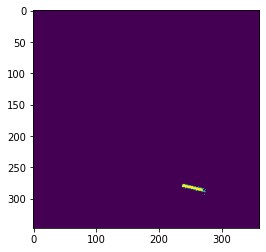

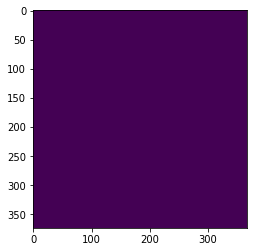

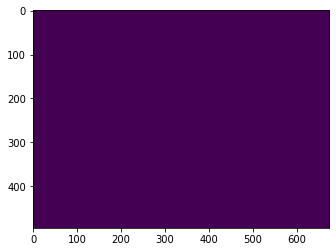

./data\0015\ground_truth\0015_ground_truth.png


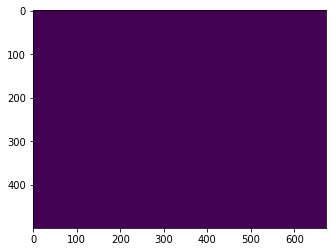

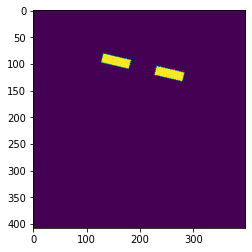

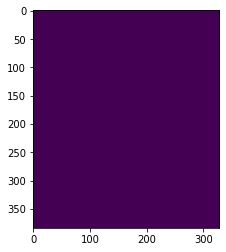

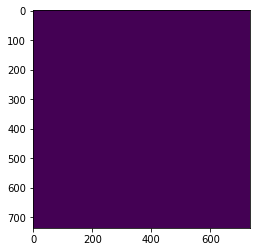

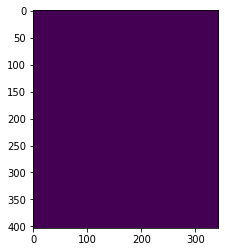

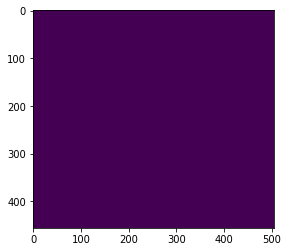

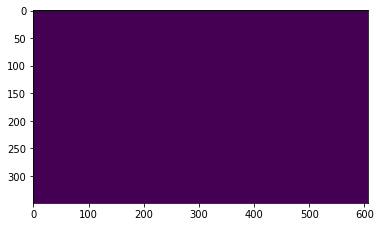

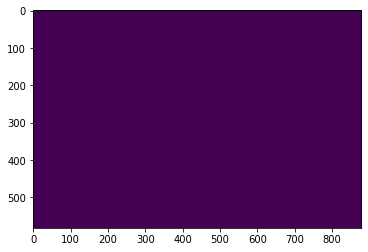

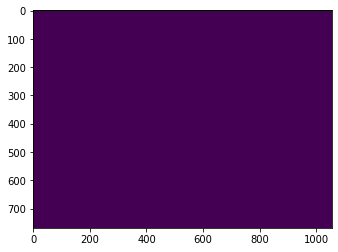

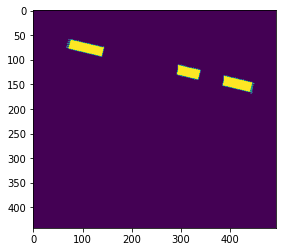

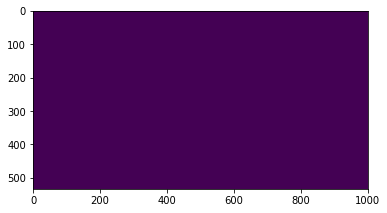

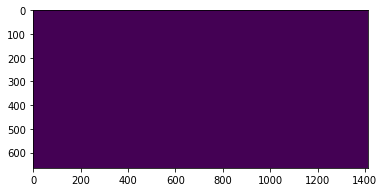

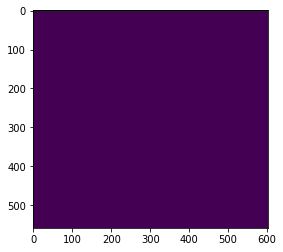

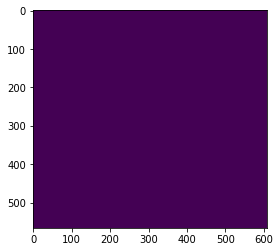

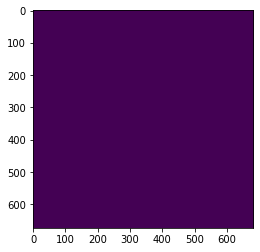

./data\0030\ground_truth\0030_ground_truth.png


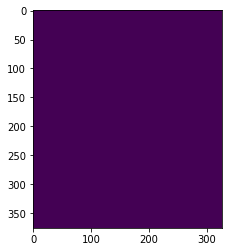

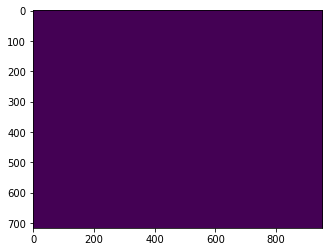

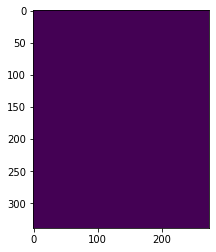

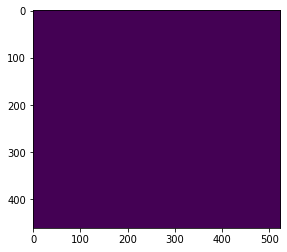

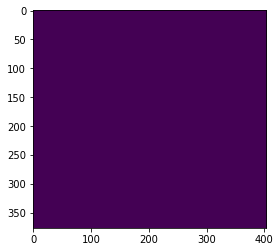

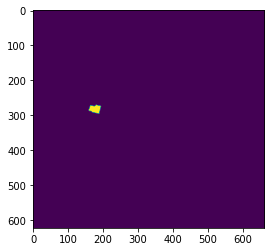

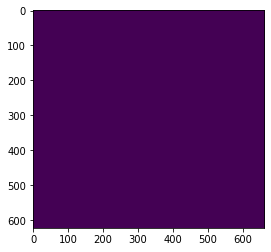

./data\0037\ground_truth\0037_ground_truth.png


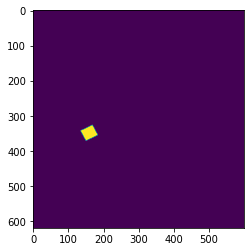

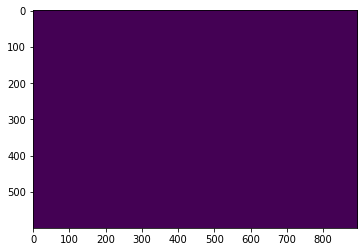

./data\0039\ground_truth\0039_ground_truth.png


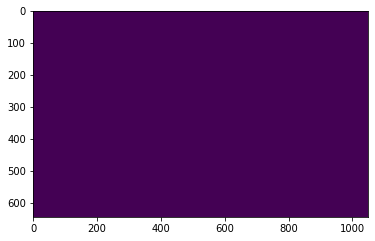

./data\0040\ground_truth\0040_ground_truth.png


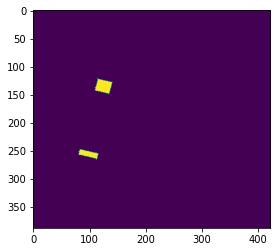

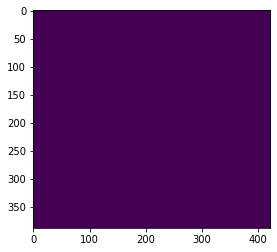

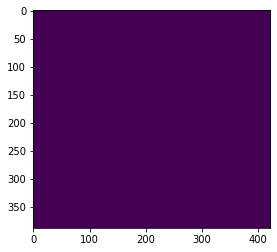

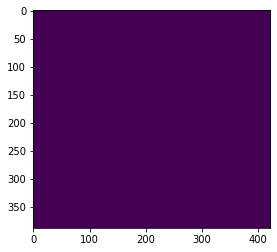

./data\0044\ground_truth\0044_ground_truth.png


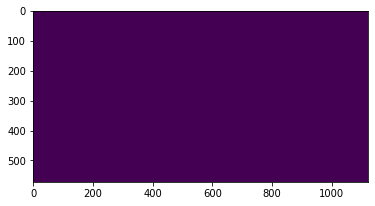

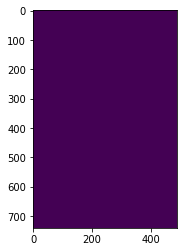

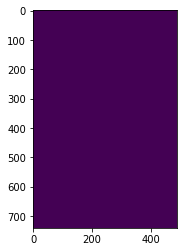

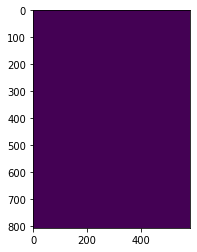

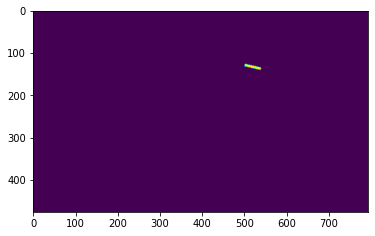

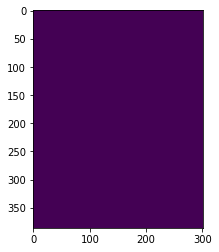

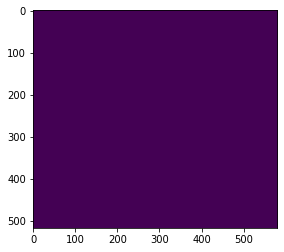

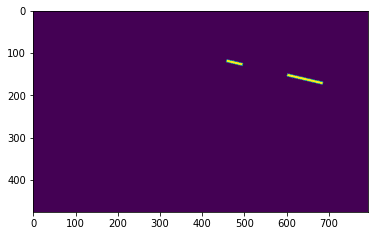

./data\0052\ground_truth\0052_ground_truth.png


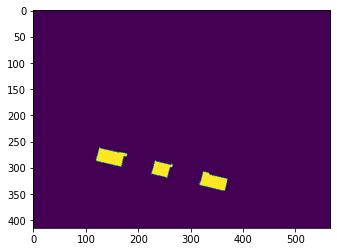

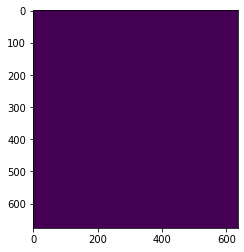

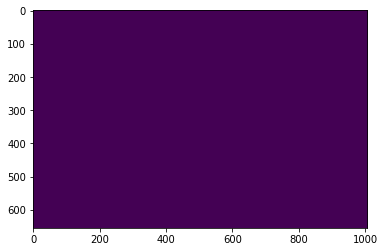

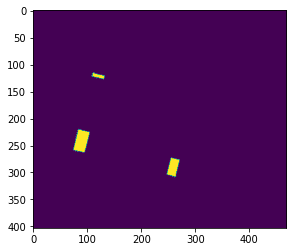

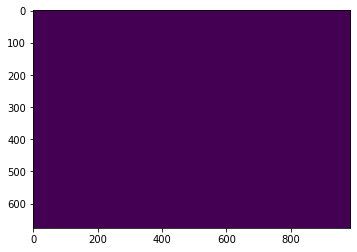

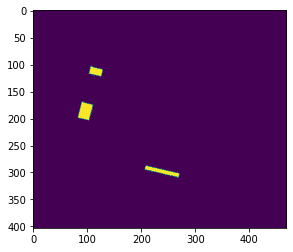

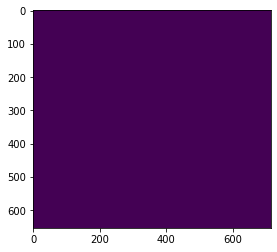

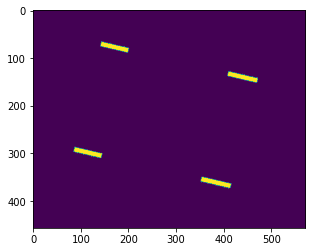

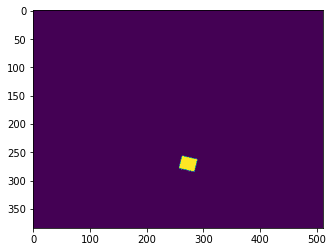

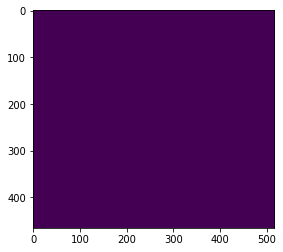

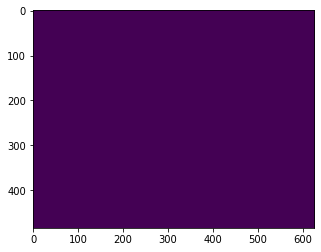

./data\0063\ground_truth\0063_ground_truth.png


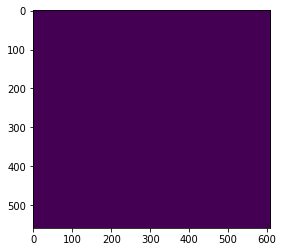

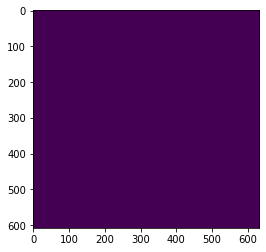

./data\0065\ground_truth\0065_ground_truth.png


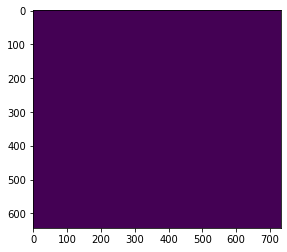

./data\0066\ground_truth\0066_ground_truth.png


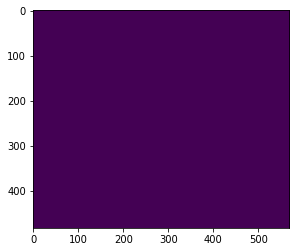

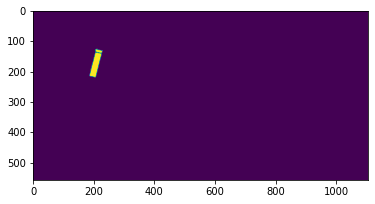

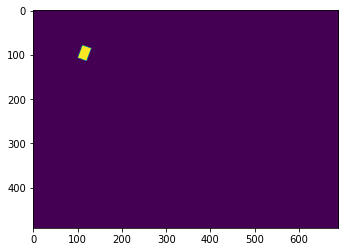

In [10]:
for p in dataset_path:
    label = tf.io.read_file(p)
    label = tf.image.decode_png(label, 3)
    # 22 Loggia (120, 56, 145)
    class_map = tf.reduce_all(tf.equal(label, [120, 56, 145]), axis=-1)
    class_map = tf.cast(class_map, tf.float32)

    
    if p.split('\\')[1] in test:
        print(p)
    plt.imshow(class_map)
    plt.show()